In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Constants
relevance_score_weight_clicked = 1
relevance_score_weight_booked = 5

In [3]:
df = pd.read_csv("training_set_cleaned.csv")
df.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,comp2_rate,comp2_inv,comp3_rate,comp3_inv,comp5_rate,comp5_inv,comp8_rate,comp8_inv,click_bool,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,...,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,1.739739e+02,7.007918e+04,3.180525e+00,3.778107e+00,6.346994e-01,2.872589e+00,1.017133e-01,...,1.804432e-02,1.688889e-02,5.350170e-03,1.923544e-02,1.016367e-02,2.447852e-02,-2.354071e-02,3.993468e-03,4.474858e-02,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,6.834525e+01,4.060992e+04,1.051024e+00,1.049583e+00,4.815144e-01,1.531011e+00,1.508413e-01,...,2.873699e-01,1.547633e-01,2.546635e-01,1.722869e-01,3.494901e-01,1.865581e-01,2.932031e-01,1.285616e-01,2.067514e-01,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.400000e-03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,2.770000e+00,3.550000e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,4.040000e+00,1.373000e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,6.980000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Is the trip international
df['is_international_trip'] = df['prop_country_id'] != df['visitor_location_country_id']

# Price difference between property and visitor's mean purchase history
#df['price_dif'] = df['price_usd'] - df['visitor_hist_adr_usd'] 
# Star rating difference between property and visitor's mean star rating history
#df['star_dif'] = df['prop_starrating'] - df['visitor_hist_starrating']

# Ratio of property star rating over property review score
df['star_review_ratio'] = df['prop_starrating']/df['prop_review_score']


In [7]:
# Discounted price compared to historical log price
df['discount_score'] = df['prop_log_historical_price'].apply(np.exp) - df['price_usd']

# How popular is the property overall (historically booked or clicked)
prop_click_rate = df.groupby('prop_id')['click_bool'].mean().rename("prop_click_rate")
prop_book_rate = df.groupby('prop_id')['booking_bool'].mean().rename("prop_book_rate")
df = df.merge(prop_click_rate, on='prop_id', how='left')
df = df.merge(prop_book_rate, on='prop_id', how='left')

In [8]:

# Average price, star rating, review in a search
avg_price_per_search = df.groupby('srch_id')['price_usd'].mean().rename("average_price_per_search")
avg_star_per_search = df.groupby('srch_id')['prop_starrating'].mean().rename("average_star_per_search")
avg_review_per_search = df.groupby('srch_id')['prop_review_score'].mean().rename("average_review_per_search")
df = df.merge(avg_price_per_search, on='srch_id', how='left')
df = df.merge(avg_star_per_search, on='srch_id', how='left')
df = df.merge(avg_review_per_search, on='srch_id', how='left')

In [9]:
# Difference between property price and average price per search
df['price_dif2'] = df['price_usd'] - df['average_price_per_search']
# Difference between property star rating and average star rating per search
df['star_dfi2'] = df['prop_starrating'] - df['average_star_per_search']
# Difference between property review score and average review score per search
df['review_dif'] = df['prop_review_score'] - df['average_review_per_search']

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

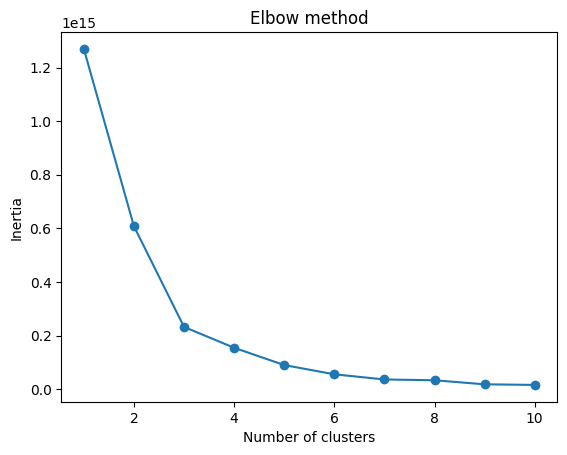

In [11]:
# Select relevant hotel features
hotel_features = df[['prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'prop_brand_bool', 'price_usd', 'prop_log_historical_price', 'promotion_flag']].copy()

# Handle missing values
hotel_features = hotel_features.fillna(hotel_features.mean())

# Normalize the features
scaler = StandardScaler()
hotel_scaled = scaler.fit_transform(hotel_features)

# Apply elbow method
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(hotel_features)
    inertias.append(kmeans.inertia_)

# Visualise results
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2)
df['hotel_cluster_id'] = kmeans.fit_predict(hotel_features)


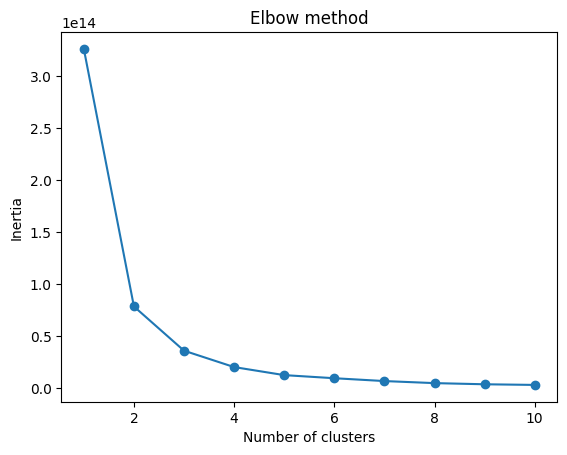

In [13]:
# Select relevant search features
search_features = df[['srch_length_of_stay', 'srch_booking_window', 
                      'srch_adults_count', 'srch_children_count', 
                      'srch_room_count', 'srch_destination_id', 
                      'srch_saturday_night_bool']].copy()

# Handle missing values
search_features = search_features.fillna(search_features.mean())

# Normalize the features
scaler = StandardScaler()
search_scaled = scaler.fit_transform(search_features)

# Apply elbow method
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(search_features)
    inertias.append(kmeans.inertia_)

# Visualise results
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3)
df['search_cluster_id'] = kmeans.fit_predict(search_features)

In [15]:
df['relevance_score'] = relevance_score_weight_clicked * df['click_bool'] + relevance_score_weight_booked * df['booking_bool']

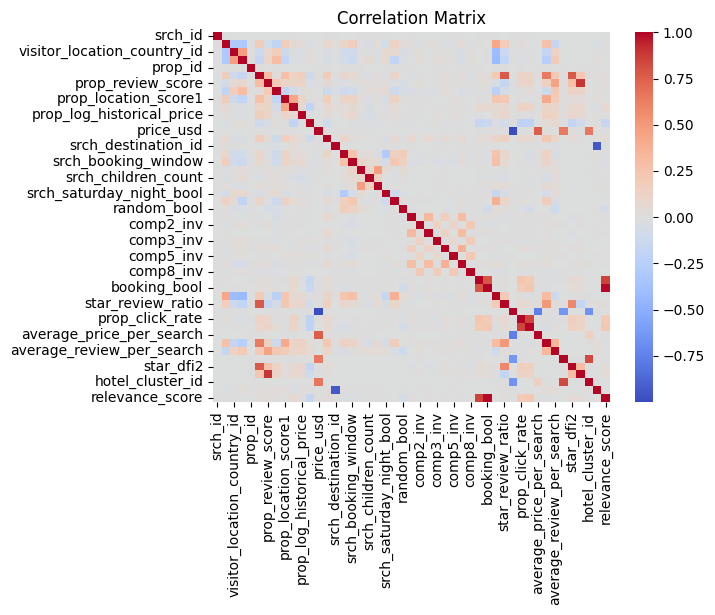

Correlation with relevance_score:
 srch_id                        0.000444
site_id                        0.000646
visitor_location_country_id    0.001092
prop_country_id                0.000277
prop_id                        0.000370
prop_starrating                0.023979
prop_review_score              0.026219
prop_brand_bool                0.008460
prop_location_score1           0.002258
prop_location_score2           0.079801
prop_log_historical_price      0.000031
position                       0.156907
price_usd                      0.000161
promotion_flag                 0.038078
srch_destination_id            0.000911
srch_length_of_stay            0.019680
srch_booking_window            0.015873
srch_adults_count              0.003494
srch_children_count            0.004459
srch_room_count                0.008052
srch_saturday_night_bool       0.004779
orig_destination_distance      0.002240
random_bool                    0.072455
comp2_rate                     0.011154
comp2

In [16]:
# Compute correlation matrix
corr_matrix = df.drop('date_time', axis=1).corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Compute correlation of each feature with the target
target_corr = corr_matrix['relevance_score'].drop('relevance_score').abs()
print("Correlation with relevance_score:\n", target_corr)

In [17]:
print("Correlation with relevance_score:\n", target_corr)

Correlation with relevance_score:
 srch_id                        0.000444
site_id                        0.000646
visitor_location_country_id    0.001092
prop_country_id                0.000277
prop_id                        0.000370
prop_starrating                0.023979
prop_review_score              0.026219
prop_brand_bool                0.008460
prop_location_score1           0.002258
prop_location_score2           0.079801
prop_log_historical_price      0.000031
position                       0.156907
price_usd                      0.000161
promotion_flag                 0.038078
srch_destination_id            0.000911
srch_length_of_stay            0.019680
srch_booking_window            0.015873
srch_adults_count              0.003494
srch_children_count            0.004459
srch_room_count                0.008052
srch_saturday_night_bool       0.004779
orig_destination_distance      0.002240
random_bool                    0.072455
comp2_rate                     0.011154
comp2

In [19]:
# Save to a new file
df.to_csv("training_set_final.csv", index=False)